### TRABALHO LUI 


NOME: MAYTA SOARES CUSTODIO\
MATRICULA: 192.671.147\
TURMA: 2019.2

###1.1. Descrição do problema

Trabalho de LUI\
Foi passado para vocês um web scrapping para extrair os dados de um site do IMBD, por favor obtendo os dados obtidos pelo scrappig, organize em tabelas (dataframes) os filmes extraídos\
1- Organize os filmes por gênero\
2- Organize os filmes por ano

Nesse script abordei uma outra forma de realizar o trabalho, através de pesquisa na internet e em sites do assunto. Fiz com 250 títlos e incorporei o filtro por metascore, que é uma métrica que classifica a qualidade. O imdb possui esse feature, decidi então incorporá-lo no trabalho e usar como filtro. Usei 250 títlos disponíveis, alterando a url manualmente no 'count=250' no meio da url e não no final.

In [1]:
# Realizando o get com 250 títulos

from requests import get
url = 'https://www.imdb.com/search/title/?count=250&title_type=feature,tv_series&ref_=nv_wl_img_2'
response = get(url)
print(response.text[:500])



<!DOCTYPE html>
<html
    xmlns:og="http://ogp.me/ns#"
    xmlns:fb="http://www.facebook.com/2008/fbml">
    <head>
         
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge">

    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">



        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>

<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle",


In [2]:
# Verificando a resposta do servidor

response

<Response [200]>

In [3]:
# Importando a biblioteca BeautifulSoup

from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)


bs4.BeautifulSoup

In [4]:
# Conferindo o número de ítens dentro da tag

movie_containers = html_soup.find_all('div', class_ = 'lister-item mode-advanced')
print(type(movie_containers))
print(len(movie_containers))

<class 'bs4.element.ResultSet'>
250


Realizado extração das informações necessárias do primeiro título para criar o script para os demais.

Tratamento para separar o nome do primeiro filme

In [5]:
first_movie = movie_containers[0]
first_movie

<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt13143964"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt13143964/"> <img alt="Borat Subsequent Moviefilm" class="loadlate" data-tconst="tt13143964" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZmY2ZmM5YTktZThiOC00YjEzLTg4YTctMDAxYWEyZmEyZDlhXkEyXkFqcGdeQXVyMjkwOTAyMDU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt13143964/">Borat Subsequent Moviefilm</a>
<span class="lister-item-year text-muted unbold">(2020)</span>
</h3>
<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">95 min</span>
<span c

In [8]:
first_name = first_movie.h3.a.text
first_name

'Borat Subsequent Moviefilm'

Tratamento para separar o ano de lançamento do primeiro filme

In [9]:
first_year = first_movie.h3.find('span', class_ = 'lister-item-year text-muted unbold')
first_year

<span class="lister-item-year text-muted unbold">(2020)</span>

In [10]:
first_year = first_year.text
first_year

'(2020)'

Tratamento para separar a primeira avaliação IMDB

In [11]:
first_movie.strong

<strong>6.9</strong>

In [12]:
first_imdb = float(first_movie.strong.text)
first_imdb

6.9

Tratamento para separar o primeiro metascore

In [13]:
first_mscore = first_movie.find('span', class_ = 'metascore favorable')

In [14]:
first_mscore = int(first_mscore.text)
print(first_mscore)

68


Tratamento para separar a duração do primeiro filme


In [15]:
first_movie.p


<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">95 min</span>
<span class="ghost">|</span>
<span class="genre">
Comedy            </span>
</p>

In [16]:
first_runtime = first_movie.find('span', attrs = {'runtime'})
first_runtime


<span class="runtime">95 min</span>

In [17]:
first_runtime.text[:6]

'95 min'

Tratamento para separar o gênero do primeiro filme

In [19]:
first_movie.p

<p class="text-muted ">
<span class="certificate">R</span>
<span class="ghost">|</span>
<span class="runtime">95 min</span>
<span class="ghost">|</span>
<span class="genre">
Comedy            </span>
</p>

In [20]:
first_genre = first_movie.find('span', attrs = {'genre'})
first_genre

<span class="genre">
Comedy            </span>

In [21]:
first_genre.text[1:-12]

'Comedy'

Tratamento para separar o diretor do primeiro filme

In [22]:
first_director = first_movie.find_all('a')[13]
first_director

<a href="/name/nm0938471/">Jason Woliner</a>

In [23]:
first_director.text

'Jason Woliner'

Tratamento para separar o primeiro número de votos

In [24]:
first_votes = first_movie.find('span', attrs = {'name':'nv'})
first_votes

<span data-value="69702" name="nv">69,702</span>

In [25]:
first_votes['data-value']

'69702'

Tratamento para separar os Atores do primeiro filme

In [26]:
first_cast = first_movie.find_all('a')[14:18]
first_cast

[<a href="/name/nm0056187/">Sacha Baron Cohen</a>,
 <a href="/name/nm7210025/">Maria Bakalova</a>,
 <a href="/name/nm0000158/">Tom Hanks</a>,
 <a href="/name/nm2483965/">Dani Popescu</a>]

In [27]:
# FAZENDO UMA LISTA PARA ARMAZENAR OS DADOS RASPADOS

names = []
years = []
imdb_ratings = []
metascores = []
runtimes = []
genres = []
directors = []
casts = []
votes = []

In [28]:
# EXTRAÍNDO AS INFORMAÇÕES INDIVIDUAIS DO 'movie container', Vamos levar me consideração os filmes que tiveram avalização metascore

for container in movie_containers:

   # Se o título possuir metascore, extrair:

    if container.find('div', class_ = 'ratings-metascore') is not None:

       # Nome
        name = container.h3.a.text
        names.append(name)

        # Ano
        year = container.h3.find('span', class_ = 'lister-item-year').text
        years.append(year)

        # Avaliação IMDB
        imdb = container.strong
        #imdb = float(container.strong).text
        imdb_ratings.append(imdb)

         # O Metascore
        m_score = container.find('span', class_ = 'metascore').text
        metascores.append(int(m_score))


        # Tempo de duração
        runtime = container.find('span', attrs = {'runtime'}).text[:-4]
        runtimes.append(int(runtime))

        # Gênero
        genre = container.find('span', attrs = {'genre'}).text[1:-12]
        genres.append(genre)

        # Diretor
        director = container.find_all('a')[13].text
        directors.append(director)

         # Elenco
        cast = container.find_all('a')[14:18]
        casts.append(cast)


        # Votos
        vote = container.find('span', attrs = {'name':'nv'})['data-value']
        votes.append(int(vote))

       


Formatando os dados em um dataframe

In [32]:
import pandas as pd

In [33]:
titulos_imdb = pd.DataFrame({'movie': names,
                       'year': years,
                       'imdb': imdb_ratings,
                        'metascore': metascores,
                        'runtime': runtimes,
                       'genre': genres,
                       'director': directors,
                       'cast': casts,
                        'votes': votes})

In [34]:
print(len(names), len(years), len(imdb_ratings), len(metascores), len(runtimes), len(genres), len(directors), len(casts), len(votes)), 

98 98 98 98 98 98 98 98 98


(None,)

In [35]:
# Dos 250 títulos, foram filtrados 93 que possuem metascore

titulos_imdb

,movie,year,imdb,metascore,runtime,genre,director,cast,votes
0,Borat Subsequent Moviefilm,(2020),[6.9],68,95,Comedy,Jason Woliner,"[[Sacha Baron Cohen], [Maria Bakalova], [Tom H...",69702
1,Rebecca,(2020),[6.0],46,121,"Drama, Mystery, Romance",Ben Wheatley,"[[Lily James], [Armie Hammer], [Kristin Scott ...",16625
2,The Witches,(2020),[5.4],47,106,"Adventure, Comedy, Family",Robert Zemeckis,"[[Anne Hathaway], [Octavia Spencer], [Stanley ...",10016
3,The Trial of the Chicago 7,(2020),[7.9],76,129,"Drama, History, Thriller",Aaron Sorkin,"[[Eddie Redmayne], [Alex Sharp], [Sacha Baron ...",46027
4,Holidate,(2020),[6.1],44,103,"Comedy, Romance",John Whitesell,"[[Emma Roberts], [Luke Bracey], [Kristin Cheno...",12327
...,...,...,...,...,...,...,...,...,...
93,Black Box,(II) (2020),[6.1],62,100,"Horror, Mystery, Sci-Fi",Emmanuel Osei-Kuffour,"[[Mamoudou Athie], [Phylicia Rashad], [Amanda ...",4997
94,The New Mutants,(2020),[5.5],43,94,"Action, Horror, Sci-Fi",Josh Boone,"[[Maisie Williams], [Anya Taylor-Joy], [Charli...",13291
95,Moneyball,(2011),[7.6],87,133,"Biography, Drama, Sport",Bennett Miller,"[[Brad Pitt], [Robin Wright], [Jonah Hill], [P...",361406
96,The Outpost,(2020),[6.8],71,123,"Action, Drama, History",Rod Lurie,"[[Scott Eastwood], [Caleb Landry Jones], [Orla...",14720


In [36]:
print(titulos_imdb.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movie      98 non-null     object
 1   year       98 non-null     object
 2   imdb       98 non-null     object
 3   metascore  98 non-null     int64 
 4   runtime    98 non-null     int64 
 5   genre      98 non-null     object
 6   director   98 non-null     object
 7   cast       98 non-null     object
 8   votes      98 non-null     int64 
dtypes: int64(3), object(6)
memory usage: 7.0+ KB
None


In [37]:
titulos_imdb.shape

(98, 9)

In [38]:
titulos_imdb.dtypes

movie        object
year         object
imdb         object
metascore     int64
runtime       int64
genre        object
director     object
cast         object
votes         int64
dtype: object

In [39]:
# converter todos os valores da coluna year para inteiros

titulos_imdb['year'].unique()

array(['(2020)', '(2006)', '(1990)', '(1996)', '(1978)', '(1991)',
       '(1993)', '(1988)', '(1940)', '(2019)', '(I) (2017)', '(1999)',
       '(I) (2020)', '(2018)', '(2001)', '(I) (2018)', '(1980)', '(1975)',
       '(I) (2012)', '(1984)', '(2015)', '(1973)', '(2013)', '(I) (2019)',
       '(2011)', '(1992)', '(2009)', '(II) (2020)', '(1995)', '(1972)',
       '(1994)', '(2012)', '(1982)', '(2014)', '(2008)', '(2007)',
       '(I) (2010)', '(2005)', '(IX) (2016)'], dtype=object)

In [40]:
titulos_imdb.loc[:, 'year'] = titulos_imdb['year'].str[-5:-1].astype(int)

In [41]:
titulos_imdb['year'].tail()

93    2020
94    2020
95    2011
96    2020
97    2019
Name: year, dtype: int64

In [42]:
# VERIFICANDO INFORMAÇÕES DAS COLUNAS NUMÉRICAS DO DF

titulos_imdb.describe()

,year,metascore,runtime,votes
count,98.000000,98.000000,98.000000,9.800000e+01
mean,2009.244898,65.153061,114.255102,2.634827e+05
std,15.930947,15.911710,23.961443,3.893083e+05
min,1940.000000,14.000000,76.000000,2.100000e+01
25%,2002.000000,55.000000,96.000000,2.341325e+04
50%,2019.000000,66.500000,109.000000,1.313960e+05
75%,2020.000000,77.500000,127.750000,3.449875e+05
max,2020.000000,100.000000,181.000000,2.301574e+06


In [43]:
# Salvando o dataframe

titulos_imdb.to_csv('titulos_imdb.csv')

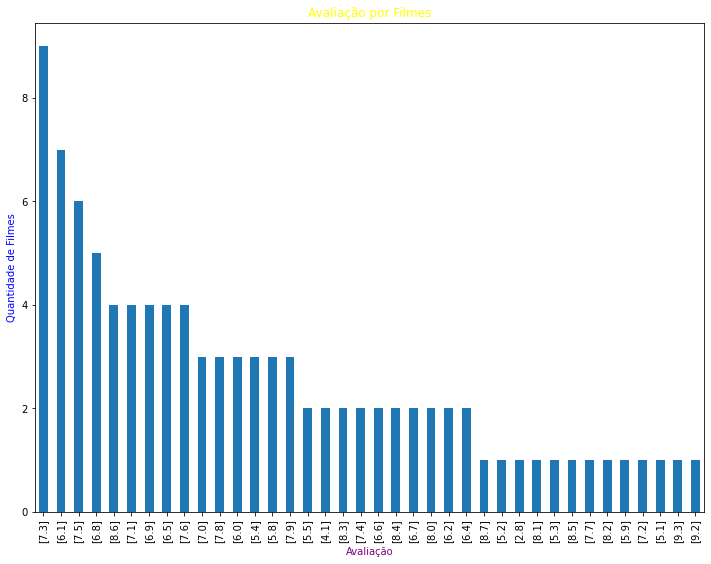

In [45]:
# PLOTAMOS UM GRÁFICO PARA ANALISAR AS AVALIAÇÕES(IMDB)

import matplotlib.pyplot as plt


plt.figure(figsize=(12, 9))
rating = titulos_imdb['imdb'].value_counts()
rating.plot(kind='bar')
plt.xlabel('Avaliação', color='purple')
plt.ylabel('Quantidade de Filmes', color='blue')
plt.title('Avaliação por Filmes', color='yellow', fontsize=12)
plt.show()

In [46]:
# Verificando de possui valores nulos

titulos_imdb.isnull().sum()

movie        0
year         0
imdb         0
metascore    0
runtime      0
genre        0
director     0
cast         0
votes        0
dtype: int64

In [47]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


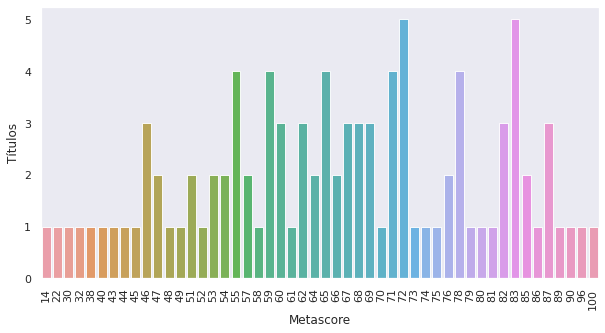

In [48]:
# Histograma de Filmes x Metascore ( métrica que classifica a qualidade)

sns.set(style="dark")
plt.figure(figsize=(10,5))
rest = titulos_imdb['metascore'].value_counts().sort_values()
sns.barplot(rest.index, rest.values, alpha=0.9)
plt.ylabel('Títulos', fontsize=12)
plt.xticks(rotation=90)
plt.xlabel('Metascore', fontsize=12)
plt.show()

## Ordenando os títulos por Gênero

In [49]:
# O(s) gênero(s) que aparecem em primeiro é a combinação de 'Ação, aventura, comédia'

Genre_filter = titulos_imdb.sort_values('genre')
Genre_filter.head()

,movie,year,imdb,metascore,runtime,genre,director,cast,votes
12,Love and Monsters,2020,[7.0],59,109,"Action, Adventure, Comedy",Michael Matthews,"[[Dylan O'Brien], [Jessica Henwick], [Michael ...",14256
86,Birds of Prey: And the Fantabulous Emancipatio...,2020,[6.1],60,109,"Action, Adventure, Crime",Cathy Yan,"[[Margot Robbie], [Rosie Perez], [Mary Elizabe...",151362
55,Mulan,2020,[5.4],66,115,"Action, Adventure, Drama",Niki Caro,"[[Yifei Liu], [Donnie Yen], [Li Gong], [Jet Li]]",66506
66,Avengers: Endgame,2019,[8.4],78,181,"Action, Adventure, Drama",Avengers: Infinity War,"[[Anthony Russo], [Joe Russo], [Robert Downey ...",776180
74,Terminator: Dark Fate,2019,[6.2],54,128,"Action, Adventure, Sci-Fi",Tim Miller,"[[Linda Hamilton], [Arnold Schwarzenegger], [M...",141741


## Ordenando os títulos por Ano

In [50]:
# O primeiro 'lançamento' da listagem é o filme Rebecca de 1940.

Year_filter = titulos_imdb.sort_values('year')
Year_filter.head()

,movie,year,imdb,metascore,runtime,genre,director,cast,votes
22,Rebecca,1940,[8.1],86,130,"Drama, Mystery, Romance",Alfred Hitchcock,"[[Laurence Olivier], [Joan Fontaine], [George ...",121490
71,The Godfather,1972,[9.2],100,175,"Crime, Drama",Francis Ford Coppola,"[[Marlon Brando], [Al Pacino], [James Caan], [...",1588454
50,The Exorcist,1973,[8.0],81,122,Horror,William Friedkin,"[[Ellen Burstyn], [Max von Sydow], [Linda Blai...",358417
65,One Flew Over the Cuckoo's Nest,1975,[8.7],83,133,Drama,Milos Forman,"[[Jack Nicholson], [Louise Fletcher], [Michael...",903673
39,The Rocky Horror Picture Show,1975,[7.4],65,100,"Comedy, Musical",Jim Sharman,"[[Tim Curry], [Susan Sarandon], [Barry Bostwic...",130896


## Ordenando os títulos primeiro por gênero e depois por ano no mesmo dataframe

In [51]:

titulos_imdb.sort_values(['genre','year']).head()

,movie,year,imdb,metascore,runtime,genre,director,cast,votes
12,Love and Monsters,2020,[7.0],59,109,"Action, Adventure, Comedy",Michael Matthews,"[[Dylan O'Brien], [Jessica Henwick], [Michael ...",14256
86,Birds of Prey: And the Fantabulous Emancipatio...,2020,[6.1],60,109,"Action, Adventure, Crime",Cathy Yan,"[[Margot Robbie], [Rosie Perez], [Mary Elizabe...",151362
66,Avengers: Endgame,2019,[8.4],78,181,"Action, Adventure, Drama",Avengers: Infinity War,"[[Anthony Russo], [Joe Russo], [Robert Downey ...",776180
55,Mulan,2020,[5.4],66,115,"Action, Adventure, Drama",Niki Caro,"[[Yifei Liu], [Donnie Yen], [Li Gong], [Jet Li]]",66506
74,Terminator: Dark Fate,2019,[6.2],54,128,"Action, Adventure, Sci-Fi",Tim Miller,"[[Linda Hamilton], [Arnold Schwarzenegger], [M...",141741


Conclusão

Os gráficos mais profundos e análise estão no outro script do código fornecido.

Nesse código tive menos dificuldade, pois fui fazendo passo-a-passo com as pesquisas, talvez de uma forma mais arcaica, mas com um nível de compreensão mais alto. O outro código ainda não me é tão inteligível. Foi um trabalho muito divertido de fazer. Mais uma vez digo que a essência da matéria foi muito bem passada pelos professores e gostei muito de como se extraem dados dos sites, pois não tenho experiência anterior em html e programação.